# Построение модели рекомендаций тарифов для абонентов оператора мобильной связи «Мегалайн»

# Описание проекта

Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра». В нашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). 


# Цели проекта

1. Построить модель для задачи классификации, которая выберет подходящий тариф с максимально большим значением *accuracy*, с долей правильных ответов по крайней мере 0.75. 
2. Проверить *accuracy* на тестовой выборке самостоятельно.
3. Дополнительная цель. Проверить модели на вменяемость.

# Ход выполнения проекта:

- Шаг 1. Откроем файл с данными и изучим общую информацию
    - Путь к файлу: /datasets/users_behavior.csv;
    - Изучим общую информацию;
    - Напишем вывод по шагу 1.
- Шаг 2. Проведем исследовательский анализ данных
    - Посмотрим структурный состав использования тарифов;
    - Изучим продолжительность звонков по тарифам;
    - Изучим показатели использования пакетов SMS в тарифах;
    - Изучим показатели использования sms-сообщений в тарифах;
    - Изучим показатели использования интернет-трафика в тарифах;
    - Построим график корреляции тарифов от израсходованных пакетных предложений;
    - Напишем вывод по шагу 2.
- Шаг 3. Разбьем данные на выборки
    - Разобьем данные на три выборки (обучающую, валидационную и тестовую выборки).
    - Напишем вывод по шагу 3.
- Шаг 4. Исследуем модели
    - Изучим 3 модели, одна из которых будет иметь хотя бы 3 значения гипепараметров;
    - Выберем лучшую модель;
    - Напишем вывод по шагу 4.
- Шаг 5. Проверим модель на тестовой выборке
    - Проведем тестирование модели (accuracy должнно быть не меньше 0.75);
    - Напишем вывод по шагу 5.
- Шаг 6. Дополнительное задание. 
    - Проверим модель на адекватность (на вменяемость);
    - Напишем вывод по шагу 6.
- Шаг 7. Напишем общий вывод по проекту и дадим реккомендации
    - Напишем общий вывод по проекту.
    
# Дополнительная информация

Предобработка данных уже проведена.

**Описание данных:**

Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. 

Известно:
сalls — количество звонков,
minutes — суммарная длительность звонков в минутах,
messages — количество sms-сообщений,
mb_used — израсходованный интернет-трафик в Мб,
is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

    Таким образом мое исследование пройдет в 7 шагов:
    1. Загрузка данных и изучение данных
    2. Исследовательский анализ данных
    3. Разделение данных на 3 выборки
    4. Исследование моделей
    5. Проверка модели на тестовой выборке
    6. Проверка модели на адекватность (на вменяемость)
    7. Общие выводы и рекомендации 

## Откройте и изучите файл

In [1]:
#импортируем библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
#загрузим датасет
df = pd.read_csv('/datasets/users_behavior.csv')
#выведем его на экран
df

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


In [3]:
#рассчитаем статистические показатели для числовых столбцов
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


In [4]:
#проверим размерность датасета
df.shape

(3214, 5)

In [5]:
#выведем общую информацию о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


**Вывод по шагу 1:**
    
Как видно, пропусков, действительно, нет. Название столбцов преведены к нижнему регистру, тип данных в каждом столбце оптимален. В среднем абоненты совершают около 63 звонков, при этом есть абоненты которые совершают до 244 звонков. В среднем абоненты тратят около 17 Гб. Около 31% абонентов имеют тариф Ultra. Более детально посмотрим на даннве во втоорм шаге.

## Проведите исследовательский анализ данных

In [6]:
#Посмотрим структурный состав использования тарифов;
df.groupby('is_ultra')['is_ultra'].count()

is_ultra
0    2229
1     985
Name: is_ultra, dtype: int64

**Как видно, более 2/3 абонентов использует тариф Smart.**

In [7]:
#Изучим продолжительность звонков по тарифам;
df.pivot_table(index='is_ultra', values='minutes', aggfunc=['mean', 'median', 'sum'])

,mean,median,sum
,minutes,minutes,minutes
is_ultra,,,
0,405.942952,410.56,904846.84
1,511.224569,502.55,503556.20


**Средние и медианные значения для тарифов различаются незначительно, но продолжительность разговоров среди абонентов с тарифом ultra больше практически на 100 минут.**

In [8]:
#Изучим показатели использования пакетов SMS в тарифах;
df.pivot_table(index='is_ultra', values='messages', aggfunc=['mean', 'median', 'sum'])

,mean,median,sum
,messages,messages,messages
is_ultra,,,
0,33.384029,28.0,74413.0
1,49.363452,38.0,48623.0


**Пакет sms среди абонентов с тарифом ultra также используется чаще.**

In [9]:
#Изучим показатели использования интернет-трафика в тарифах;
df.pivot_table(index='is_ultra', values='mb_used', aggfunc=['mean', 'median', 'sum'])

,mean,median,sum
,mb_used,mb_used,mb_used
is_ultra,,,
0,16208.466949,16506.93,36128672.83
1,19468.823228,19308.01,19176790.88


**Интернет трафик расходуется среди абонентов c тарифом smart меньше, в среднем на 3 Гб.**

In [10]:
#Построим график корреляции тарифов от израсходованных пакетных предложений;
df_smart = df.loc[df['is_ultra'] == 0]
df_ultra = df.loc[df['is_ultra'] == 1]

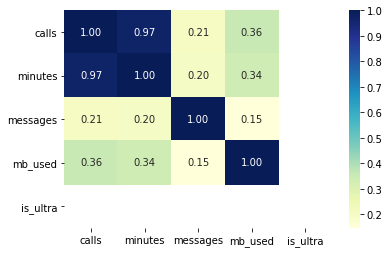

In [11]:
# строим heatmap для абонентов тарифа smart
sns.heatmap(df_smart.corr(), annot=True, fmt=".2f", cmap="YlGnBu")

# показываем heatmap
plt.show()

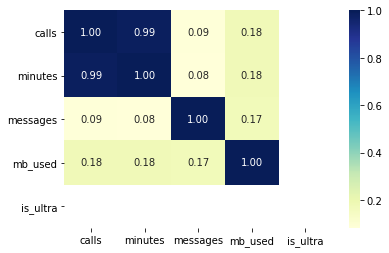

In [12]:
# строим heatmap для абонентов тарифа ultra
sns.heatmap(df_ultra.corr(), annot=True, fmt=".2f", cmap="YlGnBu")

# показываем heatmap
plt.show()

**Вывод по шагу 2:**

**Из полученных данных можно заключить, что абоненты с тарифом ultra пользуются тарифными опциями чаще, у них больше средняя продолжительность разговоров, отправленных sms и интернет трафик также потребляется в больших объемах.**

**Сильная корреляционная связь наблюдается только между продолжительностью и числом звонков, что вполне логично.**

## Разбейте данные на выборки

In [13]:
#Разобьем данные на три выборки (обучающую, валидационную и тестовую выборки).
#Выделим в отдельные переменные фичи и целевой признак
features = df[['calls', 'minutes', 'messages', 'mb_used']]
target = df['is_ultra']

In [14]:
#Разделим данные на обучающую(60%), валидационную(20%) и тестовую выборки(20%)
features_train_val, features_test, target_train_val, target_test = train_test_split(
    features, target, test_size=0.2, random_state=12345)

features_train, features_valid, target_train, target_valid = train_test_split(
    features_train_val, target_train_val, test_size=0.25, random_state=12345)

#Провреим размер каждой выборки
print('Размер обучающей выборки:', features_train.shape[0])
print('Размер валидационной выборки:', features_valid.shape[0])
print('Размер тестовой выборки:', features_test.shape[0])

Размер обучающей выборки: 1928
Размер валидационной выборки: 643
Размер тестовой выборки: 643


**Вывод по шагу 3:**
    
**Мы разделили данные на обучающую(60%), валидационную(20%) и тестовую выборки(20%).**

## Исследуйте модели

In [15]:
#для исследования возьмем 3 модели: дерево решений, случайный лес и линейную регрессию

In [16]:
#построим модель дерева решений

best_model = None
best_result = 10000
best_est = 0
best_depth = 0
for est in range(10, 111, 5):
    for depth in range(1, 11):
        model = DecisionTreeClassifier(random_state=12345, min_samples_split=est, max_depth=depth)
        model.fit(features_train, target_train)
        predictions_valid = model.predict(features_valid)
        result = accuracy_score(target_valid, predictions_valid)

        if result < best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth
model_tree = best_model
print("Accuracy")
print("Валидационная выборка:", result)

Accuracy
Валидационная выборка: 0.7838258164852255


In [18]:
#построим модель случайного леса

best_model = None
best_result = 10000
best_est = 0
best_depth = 0
for est in range(10, 111, 5):
    for depth in range(1, 11):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train)
        predictions_valid = model.predict(features_valid)
        result = accuracy_score(target_valid, predictions_valid)
    
        if result < best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth

model_forest = best_model
print("Accuracy")
print("Валидационная выборка:", result)

Accuracy
Валидационная выборка: 0.7962674961119751


<div class="alert-info">Случайный лес показывает на валидационной выборке accuracy в 0.7963 предсказывает 79.63% правильных ответов.</div>

In [20]:
#построим модель линейной регрессии

model  =  LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
model.fit(features, target)# Напишите код здесь
model.score(features, target) 
predictions_valid = model.predict(features_valid)
result = accuracy_score(target_valid, predictions_valid)
    
model_logr = model

print("Accuracy")
print("Валидационная выборка:", result)

Accuracy
Валидационная выборка: 0.7247278382581649


<div class="alert-info">Линейная регрессия на валидационной выборке c accuracy в 0.7247 предсказывает 72.47% правильных ответов.</div>

<div class="alert-info">Самый лучший показатель accuracy у модели случайного леса на валидационной выборке: 0.7962. Возьмем эту модель и проверим её предсказания на тестовой выборке.</div>

## Проверьте модель на тестовой выборке

In [22]:
#проверим accuracy лучшей модели на тестовой выборке
test_predictions = model_forest.predict(features_test)
test_accuracy_score = accuracy_score(target_test, test_predictions)

print("Accuracy")
print("Тестовая выборка:", test_accuracy_score)

Accuracy
Тестовая выборка: 0.7558320373250389


**Наша модель на тестовой выборке предсказывает 79,94% правильных ответов.**

## (бонус) Проверьте модели на адекватность

In [24]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
dummy = DummyClassifier(strategy='most_frequent', random_state=123).fit(features, target)
print('Accuracy Dummy-модели на тестовой выборке:', accuracy_score(target_test, dummy.predict(features_test)))

Accuracy Dummy-модели на тестовой выборке: 0.6951788491446346


## Общий вывод по проекту

<div class="alert-info">Пропусков в данных, действительно, не было. Из полученных данных можно заключить, что абоненты с тарифом ultra пользуются тарифными опциями чаще, у них больше средняя продолжительность разговоров, отправленных sms и интернет трафик также потребляется в больших объемах. Сильная корреляционная связь наблюдается только между продолжительностью и числом звонков, что вполне логично.

    
    Мы разделили данные на обучающую(60%), валидационную(20%) и тестовую выборки(20%).
Случайный лес на валидационной выборке с accuracy в 0.7963 предсказывает 79.63% правильных ответов.

Наша модель на тестовых данных предсказывает 79,94% правильных ответов. Т.е. это позволит правильно подсказать в 80% случаев нашим абонентам правильный тариф, на который им рекомендуется перейти с их архивного тарифа.</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75
